## Before/After
This is a script where one compare the block distribution before and afte the merging

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [89]:
## First load the Data:
ibd_folder_raw = "../Data/IBD_cm/"
ibd_folder_pp = "../Data/IBD_merged/"
file_raw = "CBchrMAF01.ibd25.ibd"


# Load the old Data
df_raw = pd.read_csv(ibd_folder_raw + file_raw, sep=",")  
columns = ["Ind1", "HapIndex1", "Ind2", "HapIndex2","Scaffold", "IBDStart", "IBDEnd", "Lod", "IBDlen"] 
df_raw.columns = columns

# Load the new Data:
df_pp = pd.read_csv(ibd_folder_pp + file_raw, sep=",")
df_pp = df_pp[columns]
print("Successfully loaded")

Successfully loaded


In [90]:
print("Longer than (Old/New)")
print("All: %i / %i" % (len(df_raw),len(df_pp)))
print("1 cm: %i / %i" % (np.sum(df_raw["IBDlen"]>1), np.sum(df_pp["IBDlen"]>1)))
print("5 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>5), np.sum(df_pp["IBDlen"]>5)))
print("20 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>20), np.sum(df_pp["IBDlen"]>20)))
print("50 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>50), np.sum(df_pp["IBDlen"]>50)))
print("100 mb: %i / %i" % (np.sum(df_raw["IBDlen"]>100), np.sum(df_pp["IBDlen"]>100)))
#print("Nr of Blocks > 500 kb: %i " % len(ibd_data[ibd_data.IBDlen>500000]))
#print("Nr of Blocks > 1 mb: %i " % len(ibd_data[ibd_data.IBDlen>1000000]))

Longer than (Old/New)
All: 120074 / 21753
1 cm: 54599 / 13213
5 mb: 4983 / 5838
20 mb: 45 / 3358
50 mb: 0 / 1659
100 mb: 0 / 490


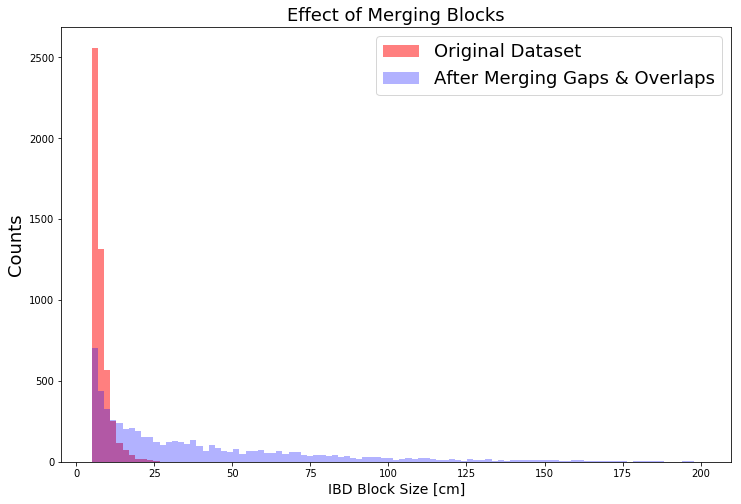

In [91]:
###
# Plot the distribution of the top blocks
# Extract Blocks longer than threshold
threshold=5.0   # 1 cm
upper_plot=200  # 200 cm
nr_bins = 100

bins = np.linspace(threshold, upper_plot, nr_bins)

plt.figure(figsize=(12,8))
plt.hist(df_raw[df_raw.IBDlen>threshold].IBDlen, bins=bins, alpha=0.5, label="Original Dataset", color="red")
plt.hist(df_pp[df_pp.IBDlen>threshold].IBDlen, bins=bins, alpha=0.3, label="After Merging Gaps & Overlaps", color="blue")
plt.ylabel("Counts", fontsize=18)
plt.xlabel("IBD Block Size [cm]", fontsize=14)
plt.title("Effect of Merging Blocks", fontsize=18)
plt.legend(loc="upper right", fontsize=18)
plt.savefig('IBD_hist.pdf', bbox_inches='tight', pad_inches=0)
plt.show()

## Hunt for the longest IBD Block

In [92]:
# Figure out the biggest gap:
df_pp.iloc[np.argmax(df_pp["IBDlen"])]

/home/harald/.local/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Ind1           CB361
HapIndex1          1
Ind2           CB369
HapIndex2          2
Scaffold           5
IBDStart       0.016
IBDEnd       212.768
Lod             4.05
IBDlen       212.752
Name: 18210, dtype: object

In [14]:
len(df_raw[(df_raw.Ind1 == "CB086") * (df_raw.Ind2 == "CB100") * (df_raw.Scaffold == 5)])

/home/harald/.local/lib/python3.5/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


3

In [151]:
max_pair = df_pp[(df_pp.Ind1 == "CB075") & (df_pp.Ind2 == "CB078")]
max_pair

,Ind1,HapIndex1,Ind2,HapIndex2,Scaffold,IBDStart,IBDEnd,Lod,IBDlen
2439,CB075,2,CB078,1,1,7.631,44.937,3.81,37.306
2440,CB075,2,CB078,1,2,20.073,80.563,3.63,60.490
2441,CB075,2,CB078,1,3,31.314,32.218,7.35,0.904
2442,CB075,2,CB078,1,3,69.173,169.715,3.74,100.542
2443,CB075,2,CB078,2,3,180.036,186.437,4.02,6.401
2444,CB075,2,CB078,1,4,4.521,114.173,12.46,109.652
2445,CB075,2,CB078,1,5,3.918,28.913,6.95,24.995
2446,CB075,1,CB078,2,5,58.390,184.101,3.38,125.711
2447,CB075,2,CB078,2,5,197.312,211.947,10.32,14.635
2448,CB075,1,CB078,2,6,1.928,45.149,6.07,43.221


In [94]:
np.sum(max_pair["IBDlen"])

443.15700000000004

In [95]:
df_pp[df_pp["IBDlen"]>100]

,Ind1,HapIndex1,Ind2,HapIndex2,Scaffold,IBDStart,IBDEnd,Lod,IBDlen
69,CB001,1,CB100,2,3,4.597,116.022,3.32,111.425
84,CB001,2,CB154,2,3,84.667,186.257,3.75,101.590
111,CB001,1,CB162,2,3,4.457,160.184,3.31,155.727
217,CB001,1,CB337,1,3,49.627,181.838,3.16,132.211
290,CB001,1,CB381,1,3,32.458,154.254,3.86,121.796
386,CB001,2,RP296,2,5,66.758,193.509,7.23,126.751
475,CB047,2,CB154,2,5,0.063,166.429,3.68,166.366
487,CB047,1,CB156,1,5,12.938,164.932,4.64,151.994
495,CB047,2,CB158,2,5,0.069,161.430,3.93,161.361
633,CB047,1,CB373,1,3,32.734,179.984,3.72,147.250


# Check for long IBD Sharing per Linkage Group

In [156]:
cut=100.0
df_long = df_pp[df_pp["IBDlen"]>cut]
print("Nr of IBD blocks >%i: %i" % (cut,len(df_long)))

counts = df_long.groupby("Scaffold").size()
cm = np.array([46.253, 120.603, 186.521, 115.52, 211.884, 83.337, 97.019])

for i in counts.index:
    print("\nLG: %i" % i)
    print("Nr Blocks: %i" % counts[i])
    print("Lenght: %.2f" % cm[i-1])
    
    ratio = (counts[i]/ cm[i-1])
    print("Ratio per cm: %.3f" % ratio)

Nr of IBD blocks >100: 490

LG: 2
Nr Blocks: 16
Lenght: 120.60
Ratio per cm: 0.133

LG: 3
Nr Blocks: 173
Lenght: 186.52
Ratio per cm: 0.928

LG: 4
Nr Blocks: 23
Lenght: 115.52
Ratio per cm: 0.199

LG: 5
Nr Blocks: 278
Lenght: 211.88
Ratio per cm: 1.312


## Group by all pairs. Test for top individuals

In [122]:
cut=0.0
df_long = df_pp[df_pp["IBDlen"]>cut]
df_stat = df_long.groupby(["Ind1", "Ind2"])['IBDlen'].agg(["count", "sum", "max"])
df_stat

count      sum      max
Ind1  Ind2                          
CB001 CB047      4    8.469    3.230
      CB061     10  175.859   82.568
      CB063      4    4.620    1.688
      CB068      3    2.488    1.946
      CB073      1    0.351    0.351
      CB074     10   96.981   54.291
      CB075      2   29.978   29.130
      CB077      1   20.531   20.531
      CB078      3    6.310    3.283
      CB081      3    2.036    1.856
      CB082      2    6.017    5.522
      CB083      6   13.979   10.469
      CB085      3    1.428    0.708
      CB086      3    5.249    3.159
      CB087      3    1.022    0.498
      CB088      1    0.324    0.324
      CB090      1    1.540    1.540
      CB092      4    1.729    0.763
      CB093      2    3.245    1.721
      CB100      6  128.110  111.425
      CB102      2   40.257   38.337
      CB103      3    1.780    1.073
      CB151      4   73.409   70.191
      CB154      5  110.033  101.590
      CB156      4    4.928    2.822
      CB158      6  111.449   71.912
      CB159      3    1.780    0.984
      CB160     10   97.020   32.025
      CB162      6  212.106  155.727
      CB163      6  266.786   87.524
...            ...      ...      ...
RP296 CB370      1    1.870    1.870
      CB371      3    2.627    1.438
      CB373      2    4.626    3.981
      CB374      1    1.730    1.730
      CB375      2    2.790    1.802
      CB376      2    4.917    3.853
      CB377      1   17.900   17.900
      CB381      3    2.701    1.367
      CB382      1    0.262    0.262
      CB383      2    0.843    0.562
      CB385      6   48.275   43.580
      CB388      1    0.254    0.254
      CB391      4    8.045    6.690
      CB392     11   85.821   38.437
      CB394      2    0.793    0.539
      CB401      3    3.992    3.239
      CB405      4    2.923    2.274
      CB406      4    7.888    3.853
      CB407      1    1.378    1.378
      CB410      3   13.330    9.498
      CB412      3    3.943    3.113
      CB414      1    0.955    0.955
      CB416      1    1.009    1.009
      CB417      5    7.531    3.585
      CB418      6    5.127    1.654
      CB475      1    0.551    0.551
      CB477      5   76.145   66.598
      CB478      9    8.156    1.538
      CB479      1    0.116    0.116
      CB480     11  320.564  143.643

[5262 rows x 3 columns]

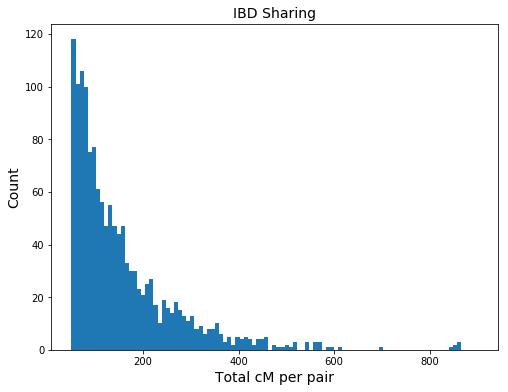

In [149]:
plt.figure(figsize=(8,6))
bins=np.linspace(50,900, 100)
plt.hist(df_stat["sum"], bins=bins)
plt.title("IBD Sharing", fontsize=14)
plt.xlabel("Total cM per pair", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.show()

In [1]:
df100 = df_stat[df_stat["max"]>100]
df100


NameError: name 'df_stat' is not defined